# Visualization

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

print(alt.__version__)

5.5.0


In [2]:
csv_file = "data/titanic.csv"

In [3]:
df = pl.read_csv(csv_file)
df.head(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [4]:
passenger_class_counts_df = (
    df["Pclass"]
    .value_counts()
    .sort("Pclass")
)
passenger_class_counts_df

Pclass,count
i64,u32
1,216
2,184
3,491


In [5]:
(
    passenger_class_counts_df
    .plot
    .bar(
        x="Pclass",
        y="count"
    )
)

alt.Chart(...)

In [7]:
(
    passenger_class_counts_df
    .plot
    .bar(
        x="Pclass:O",  # Not zero.
        y="count"
    )
)

alt.Chart(...)

In [8]:
(
    passenger_class_counts_df
    .plot
    .bar(
        x="Pclass:O",  # Not zero.
        y="count"
    )
    .properties(
        width=500
    )
)

alt.Chart(...)

In [9]:
(
    passenger_class_counts_df
    .with_columns(
        pl.col("Pclass").cast(pl.String)
    )
    .plot
    .bar(
        x="Pclass",
        y="count"
    )
    .properties(
        width=500
    )
)

alt.Chart(...)

In [10]:
(
    passenger_class_counts_df
    .plot
    .bar(
        x="Pclass:O",
        y="count",
        tooltip=[
            alt.Tooltip("Pclass", title="Passenger class"),
            alt.Tooltip("count", title="Count", format="f")
        ]
    )
    .properties(
        width=500,
        title="Number of passengers by class"
    )
)

alt.Chart(...)

In [11]:
(
    passenger_class_counts_df
    .plot
    .bar(
        x=alt.X("Pclass:O", title="Passenger class"),
        y=alt.Y("count", title="Number of passenger"),
        tooltip=[
            alt.Tooltip("Pclass", title="Passenger class"),
            alt.Tooltip("count", title="Count", format="f")
        ]
    )
    .properties(
        width=500
    )
)

alt.Chart(...)

In [13]:
(
    df
    .select("Pclass")
    .plot
    .bar(
        x=alt.X("Pclass:O", title="Passenger class"),
        y=alt.Y("count()", title="Number of Passengers")
    )
    .properties(
        width=500
    )
)

alt.Chart(...)

In [14]:
(
    df
    .plot
    .bar(
        x=alt.X("Pclass:O", title="Passenger class"),
        y=alt.Y("count()", title="Number of Passengers"),
        color=alt.Color("Survived:N", legend=alt.Legend(title="Survived")),
        tooltip=["Pclass", "Survived", "count()"]
    )
    .properties(
        width=500
    )
)

alt.Chart(...)

In [15]:
(
    df
    .plot
    .scatter(
        x="Age",
        y="Fare"
    )
    .properties(
        width=500
    )
)

alt.Chart(...)

In [16]:
(
    df
    .plot
    .scatter(
        x="Age",
        y="Fare",
        color="Pclass:N"
    )
    .properties(
        width=500
    )
)

alt.Chart(...)

In [17]:
(
    df
    .plot
    .scatter(
        x="Age",
        y="Fare",
        color="Pclass:N",
        tooltip=["Age", "Fare", "Pclass", "Name"]
    )
    .properties(
        width=500,
        title="Age vs Fare"
    )
)

alt.Chart(...)

In [18]:
(
    df
    .plot
    .scatter(
        x="Age",
        y="Fare",
        color="Pclass:O",
        tooltip=["Age", "Fare", "Pclass", "Name"]
    )
    .properties(
        width=500,
        title="Age vs Fare"
    )
)

alt.Chart(...)

In [20]:
(
    df
    .plot
    .scatter(
        x="Age",
        y="Fare",
        color="Pclass:N",
        tooltip=["Age", "Fare", "Pclass", "Name"]
    )
    .properties(
        width=500,
        title="Age vs Fare"
    )
    .configure_range(
        category={"scheme": "dark2"}
    )
)

alt.Chart(...)

<BarContainer object of 3 artists>

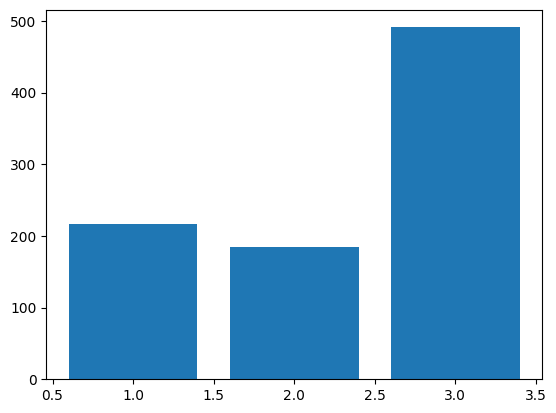

In [22]:
(
    plt.bar(
        x=passenger_class_counts_df["Pclass"],
        height=passenger_class_counts_df["count"]
    )
)

<BarContainer object of 3 artists>

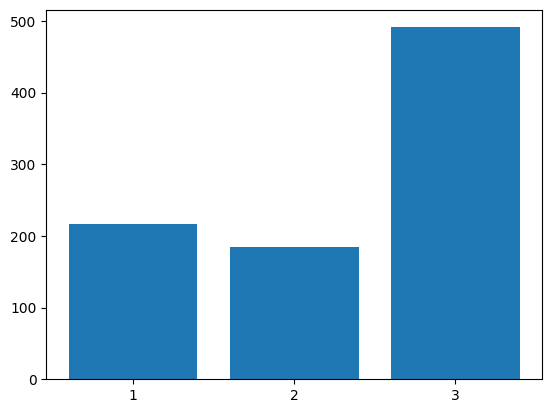

In [23]:
passenger_class_counts_string_column_df = (
    passenger_class_counts_df
    .with_columns(
        pl.col("Pclass").cast(pl.String)
    )
)

(
    plt.bar(
        x=passenger_class_counts_string_column_df["Pclass"],
        height=passenger_class_counts_string_column_df["count"]
    )
)

<Axes: xlabel='Pclass', ylabel='count'>

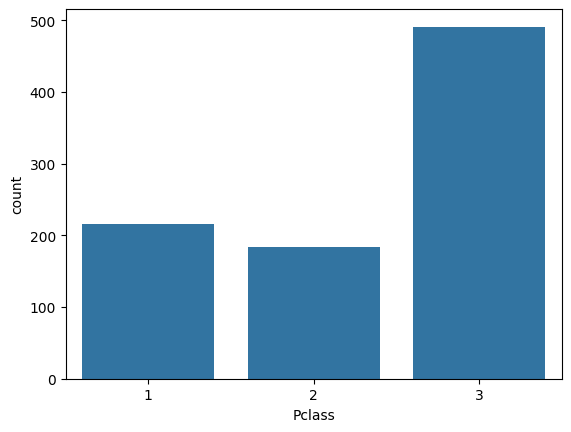

In [24]:
(
    sns.barplot(
        passenger_class_counts_df,
        x="Pclass",
        y="count"
    )
)

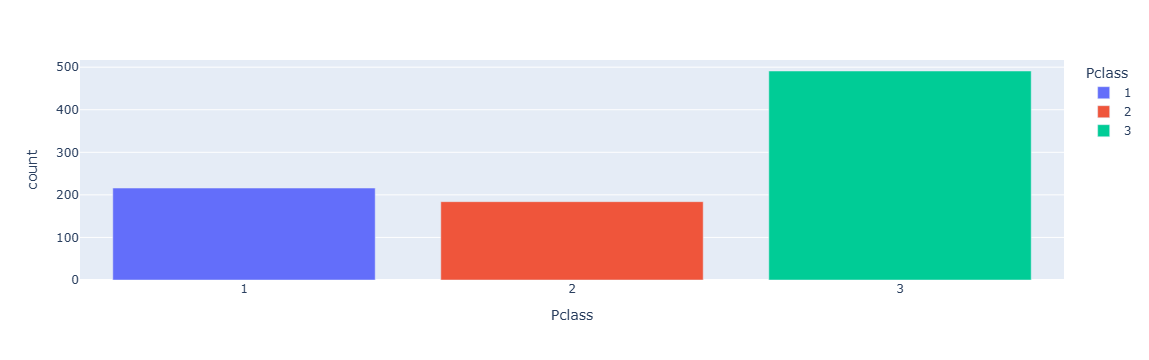

In [25]:
(
    px.bar(
        passenger_class_counts_string_column_df,
        x="Pclass",
        y="count",
        color="Pclass",
        width=400
    )
)

In [26]:
(
    alt.Chart(
        passenger_class_counts_df,
        width=600
    )
    .mark_bar()
    .encode(
        x="Pclass:N",
        y="count:Q",
        color="Pclass:N"
    )
)

alt.Chart(...)